<a href="https://colab.research.google.com/github/hwan95/HonegongML/blob/main/CH3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접 이웃 회귀 KNeighborsRegressor

회귀 : 두 변수 사이의 상관관계를 분석하는 방법


## 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
import matplotlib.pyplot as plt

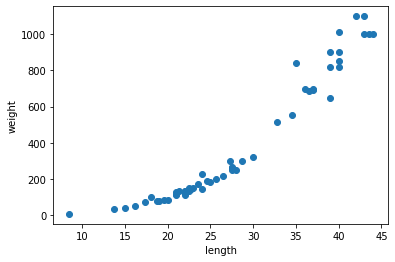

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [36]:
#데이터 분류
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [37]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [38]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [39]:
train_input= train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정계수 R2 :1에 가까울 수록 좋다
model.score() 로 구한

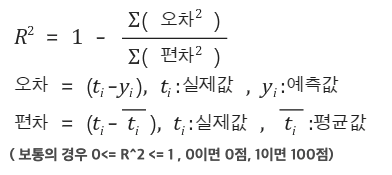

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [42]:
knr.score(test_input,test_target)

0.992809406101064

mean_abosolute_error() : 타깃과 예측의 절댓값 오차의 평균

mean_sqaured_error(): 오차의 제곱의 평균

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


In [49]:
# 상관계수 계산해보기
std = test_target.std()
mse = mean_squared_error(test_target, test_prediction)

In [53]:
print(1- mse/(std*std), knr.score(test_input,test_target))

0.992809406101064 0.992809406101064


In [14]:
print(knr.score(train_input, train_target))
# 훈련세트의 점수보다 테스트세트의 점수가 높다

0.9698823289099254


##과대 적합 과 과소 적합

과대 적합 : 훈련세트 점수는 높으나 테스트 세트 점수가 나쁜 경우

과소 적합 : 훈련세트보다 테스트의 점수가 높거나 두 점수가 모두 낮은 경우

=>이웃의 개수를 조절

*   이웃의 개수를 줄이면 국지적인 패턴에 민감
*   이웃의 개수를 늘리면 데이터의 일반적인 패턴을 따름



In [15]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [17]:
print(knr.score(test_input, test_target))

0.9746459963987609


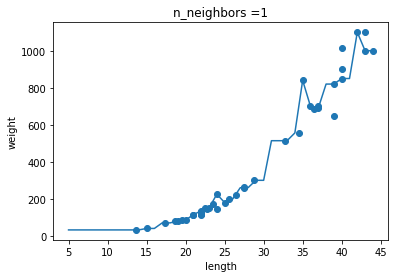

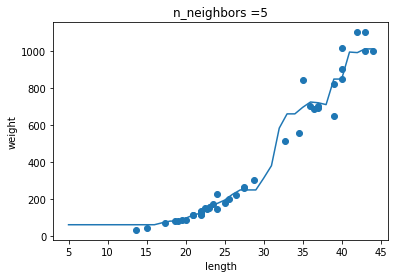

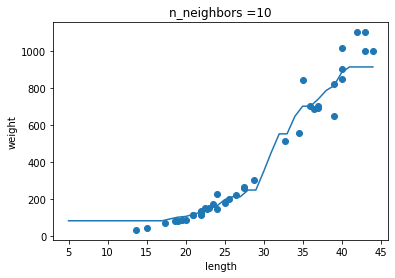

In [19]:
# 연습
knr = KNeighborsRegressor()

x= np.arange(5,45).reshape(-1,1)

for n in [1,5,10]:

  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x,prediction)
  plt.title('n_neighbors ={}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

##한계

새로운 샘플이 훈련세트의 범위를 범어나면 엉뚱한 값을 예측 할 수 있다

In [20]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state =42
)

In [21]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [23]:
# 최근접 이웃 개수 3 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)
print(knr.predict([[50]])) # 예측무게 1.033

[1033.33333333]


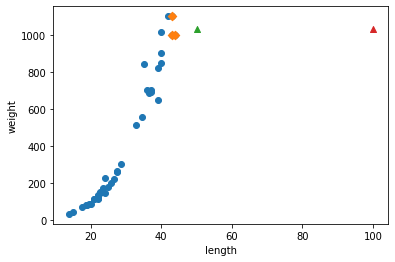

In [28]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
#이웃샘플
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
#50cm 농어 예측데이터
plt.scatter(50,1033, marker='^')
#100cm 농어 예측 데이터
plt.scatter(100,knr.predict([[100]]), marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

새로운 샘플이 훈련세트의 범위를 범어나면 엉뚱한 값을 예측 할 수 있다

# 선형 회귀 Linear Regression
일차함수 모델

## 데이터 준비

In [54]:
import numpy as np

In [55]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [58]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target= train_test_split(
    perch_length, perch_weight, random_state = 42
)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

## 선형회귀 모델 학습


In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [61]:
# 기울기, 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


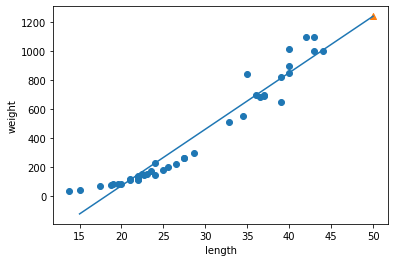

In [62]:
plt.scatter(train_input, train_target)
# x range 15-50
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

#50농어 데이터
plt.scatter(50,1241.8, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [63]:
# 과소 적합
print(lr.score(train_input, train_target)) #훈련세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.939846333997604
0.8247503123313558


#다항 회귀 Polynomial Regression
다항함수 모델

In [65]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [66]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [67]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [68]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [73]:
# 방정식 함수
ef lr_predict(x):
  y = lr.coef_[0]*(x**2) + lr.coef_[1]*x +lr.intercept_
  return y

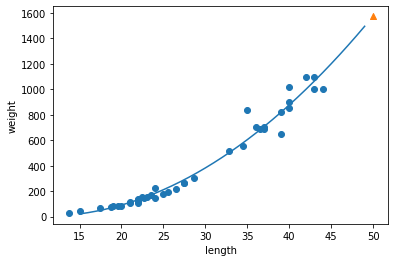

In [75]:
point = np.arange(15,50)

plt.scatter(train_input, train_target)

plt.plot(point,lr_predict(point))

plt.scatter(50, lr.predict([[50**2,50]]), marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()